In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib import cm, colors
import matplotlib.colors as mcolors
import matplotlib.colors
from data_prep_functions import *

In [2]:
# parameters
selected_period = "year"

**1 - data description**

In [3]:
data = pd.read_csv("../data/languages.csv")

In [4]:
data.nunique()

num_pushers      12624
language           384
language_type        4
iso2_code          164
year                 4
quarter              4
dtype: int64

**2 - complexity related visuals**

In [5]:
# use data_prep_functions to clean the dataframe of ECI_software calculation
data = pd.read_csv("../data/languages.csv")
data = data[data["year"].isin([2020, 2021, 2022, 2023])]
prev_filter = "|".join(["yaml", "json", "text", "svg", "Markdown", "xml"])
df = drop_specifics_from_list(data, filter_list=prev_filter)
df = top_languages_filter(df, nr_languages=150)
df = drop_country_codes_from_list(df, country_list=["EU"])
df = add_period_ids(df, period=selected_period)
print(df.shape)

(93076, 7)


In [4]:
def mcl_raw_matrix(df, key_columns, heatmap, custom_colors, size, ax=None):
    table = df[key_columns]
    
    table = pd.pivot_table(table,
        values=key_columns[2],
        index=key_columns[1],
        columns=key_columns[0],
        aggfunc=np.sum,
        margins=True,
        margins_name='total')

    table = table\
            .sort_values(by=["total"], ascending=False, axis=0)\
            .sort_values(by=["total"], ascending=False, axis=1)

    table = table.drop(["total"], axis=1).drop(["total"], axis=0)

    table = np.log10(table)
    table.replace([np.inf, -np.inf], 0, inplace=True)
    table.fillna(0, inplace=True)

    if heatmap==False:
        return table
    else:
        if ax is None:
            ax = plt.gca()
        
        cvals  = [table.values.min(), table.values.max()]
        norm=plt.Normalize(min(cvals),max(cvals))
        tuples = list(zip(map(norm,cvals), custom_colors))
        custom_map = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)
        
        sns.heatmap(table, cbar=False, cmap=custom_map, ax=ax)
        ax.set_xlabel("", size=size)
        ax.set_ylabel("", size=size)
        ax.tick_params("x", labelsize=size-5)
        ax.tick_params("y", labelsize=size-5)

        # customize x and y ticks
        xticks = np.arange(0, len(table.columns), 5)
        yticks = np.arange(0, len(table.index), 3)
        ax.set_xticks(xticks)
        ax.set_xticklabels([table.columns[i] for i in xticks], rotation=90, ha='right')
        ax.set_yticks(yticks)
        ax.set_yticklabels([table.index[i] for i in yticks])

        # add custom colorbar
        my_cmap = custom_map
        sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0, table.values.max()))
        sm.set_array([])
        cbar = plt.colorbar(sm, orientation="vertical", pad=0.025, shrink=0.9925, aspect=40, ax=ax)
        cbar.ax.set_ylabel("Number of pushers", size=size+15)
        cbar.ax.get_yaxis().labelpad = 10
        cbar.ax.tick_params(labelsize=size-5)
        cbar.set_ticks([0, 1, 2, 3, 4, 5, 6])
        cbar.set_ticklabels([r'$10^0$', r'$10^1$', r'$10^2$', r'$10^3$', r'$10^4$', r'$10^5$', r'$10^6$'])

/var/folders/9d/8j37_fks51x11mk0_zwqsd940000gn/T/ipykernel_40346/3886217884.py:4: FutureWarning: The provided callable <function sum at 0x1158de020> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table = pd.pivot_table(table,
/var/folders/9d/8j37_fks51x11mk0_zwqsd940000gn/T/ipykernel_40346/3886217884.py:4: FutureWarning: The provided callable <function sum at 0x1158de020> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table = pd.pivot_table(table,
/var/folders/9d/8j37_fks51x11mk0_zwqsd940000gn/T/ipykernel_40346/3886217884.py:4: FutureWarning: The provided callable <function sum at 0x1158de020> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior p

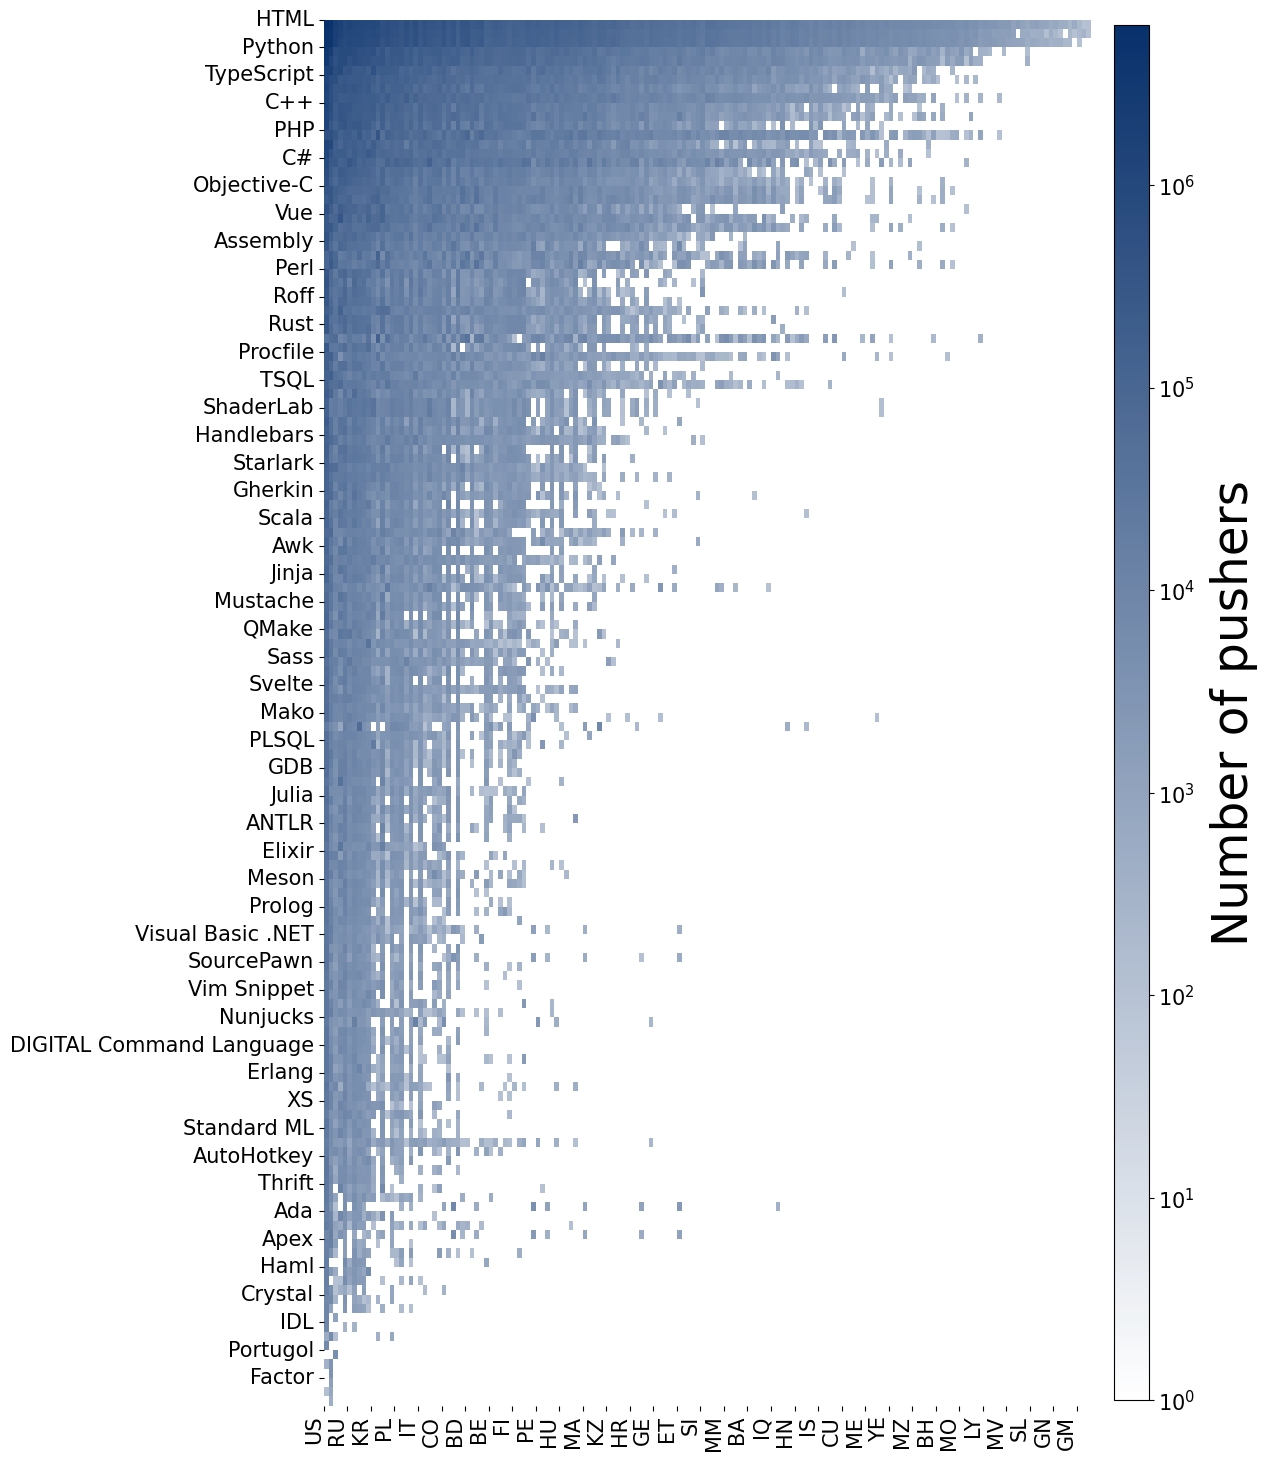

In [5]:
fig, ax = plt.subplots(1,1, figsize=(12, 18))
mcl_raw_matrix(df, key_columns=["iso2_code", "language", "num_pushers"], heatmap=True, custom_colors=["#ffffff","#08306b"], size=20, ax=ax)

In [6]:
def mcl_raw_matrix_nolabels(df, key_columns, heatmap, custom_colors, size, ax=None):
    table = df[key_columns]
    
    table = pd.pivot_table(table,
        values=key_columns[2],
        index=key_columns[1],
        columns=key_columns[0],
        aggfunc=np.sum,
        margins=True,
        margins_name='total')

    table = table\
            .sort_values(by=["total"], ascending=False, axis=0)\
            .sort_values(by=["total"], ascending=False, axis=1)

    table = table.drop(["total"], axis=1).drop(["total"], axis=0)

    table = np.log10(table)
    table.replace([np.inf, -np.inf], 0, inplace=True)
    table.fillna(0, inplace=True)
    table = table.T

    if heatmap==False:
        return table
    else:
        if ax is None:
            ax = plt.gca()
        
        cvals  = [table.values.min(), table.values.max()]
        norm=plt.Normalize(min(cvals),max(cvals))
        tuples = list(zip(map(norm,cvals), custom_colors))
        custom_map = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)
        
        sns.heatmap(table, cbar=False, cmap=custom_map, ax=ax)
        ax.set_xlabel("Language", size=size)
        ax.set_ylabel("Country", size=size)
        ax.set_xticklabels("")
        ax.set_yticklabels("")
        ax.tick_params(left = False, bottom = False)

In [7]:
def mcp_matrix(df, key_columns, heatmap, custom_colors, labels, fontsize, ax=None):
    table = df[key_columns]
    table = pd.pivot_table(table,
        values=key_columns[2],
        index=key_columns[0],
        columns=key_columns[1],
        aggfunc="sum",
        margins=True,
        margins_name='total')
    
    table = table\
        .sort_values(by=["total"], ascending=False, axis=0)\
        .sort_values(by=["total"], ascending=False, axis=1)

    table = table.drop(["total"], axis=1).drop(["total"], axis=0)

    if heatmap==False:
        return table
    else:
        if ax is None:
            ax = plt.gca()
        #custom_colors = ["#ffffff", "#08306b"]
        custom_cmap = mcolors.ListedColormap(custom_colors)
        sns.heatmap(table, cbar=False, cmap=custom_cmap, ax=ax)
        ax.set_title(labels[0], size=fontsize)
        ax.set_xlabel(labels[1], size=fontsize)
        ax.set_ylabel(labels[2], size=fontsize)
        ax.set_xticklabels("")
        ax.set_yticklabels("")
        ax.tick_params(left = False, bottom = False)

In [27]:
def mcc_matrix(df, key_columns, heatmap, custom_colors, size, ax=None):
    mat = mcp_matrix(df, key_columns, heatmap=False, custom_colors=["#ffffff","#08306b"], labels=["RCA", "Languages", "Countries"], fontsize=size).values
    t_mat = mat.transpose()

    mccp = np.dot(t_mat, mat)
    mccp = pd.DataFrame(mccp, columns=list(mcp_matrix(df, key_columns, heatmap=False, custom_colors=["#ffffff","#08306b"], labels=["RCA", "Languages", "Countries"], fontsize=size).columns))

    if heatmap==False:
        return mccp
    else:
        if ax is None:
            ax = plt.gca()
        #mccp = np.log10(mccp)
        #mccp.replace([np.inf, -np.inf], 0, inplace=True)
        mccp.fillna(0, inplace=True)
    
        cvals  = [mccp.values.min(), mccp.values.max()]
        norm=plt.Normalize(min(cvals),max(cvals))
        tuples = list(zip(map(norm,cvals), custom_colors))
        custom_map = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)

        sns.heatmap(mccp, cbar=False, cmap=custom_map, ax=ax)
        ax.set_title("Mcc' ", size=size)
        ax.set_xlabel("Country", size=size)
        ax.set_ylabel("Country", size=size)
        ax.set_xticklabels("")
        ax.set_yticklabels("")
        ax.tick_params(left = False, bottom = False)


def mll_matrix(df, key_columns, heatmap, custom_colors, size, ax=None):
    mat = mcp_matrix(df, key_columns, heatmap=False, custom_colors=["#ffffff","#08306b"], labels=["RCA", "Languages", "Countries"], fontsize=size).values
    t_mat = mat.transpose()
    mllp = np.dot(mat, t_mat) 
    mllp = pd.DataFrame(mllp, columns=list(mcp_matrix(df, key_columns, heatmap=False, custom_colors=["#ffffff","#08306b"], labels=["RCA", "Languages", "Countries"], fontsize=size).index))

    if heatmap==False:
        return mllp
    else:
        if ax is None:
            ax = plt.gca()

        #mllp = np.log10(mllp)
        #mllp.replace([np.inf, -np.inf], 0, inplace=True)
        mllp.fillna(0, inplace=True)
    

        cvals  = [mllp.values.min(), mllp.values.max()]
        norm=plt.Normalize(min(cvals),max(cvals))
        tuples = list(zip(map(norm,cvals), custom_colors))
        custom_map = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)

        sns.heatmap(mllp, cbar=False, cmap=custom_map, ax=ax)
        ax.set_title("Mll' ", size=size+2)
        ax.set_xlabel("Language", size=size)
        ax.set_ylabel("Language", size=size)
        ax.set_xticklabels("")
        ax.set_yticklabels("")
        ax.tick_params(left = False, bottom = False)

/var/folders/9d/8j37_fks51x11mk0_zwqsd940000gn/T/ipykernel_44171/3928060801.py:4: FutureWarning: The provided callable <function sum at 0x105ce6020> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table = pd.pivot_table(table,
/var/folders/9d/8j37_fks51x11mk0_zwqsd940000gn/T/ipykernel_44171/3928060801.py:4: FutureWarning: The provided callable <function sum at 0x105ce6020> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table = pd.pivot_table(table,
/var/folders/9d/8j37_fks51x11mk0_zwqsd940000gn/T/ipykernel_44171/3928060801.py:4: FutureWarning: The provided callable <function sum at 0x105ce6020> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior p

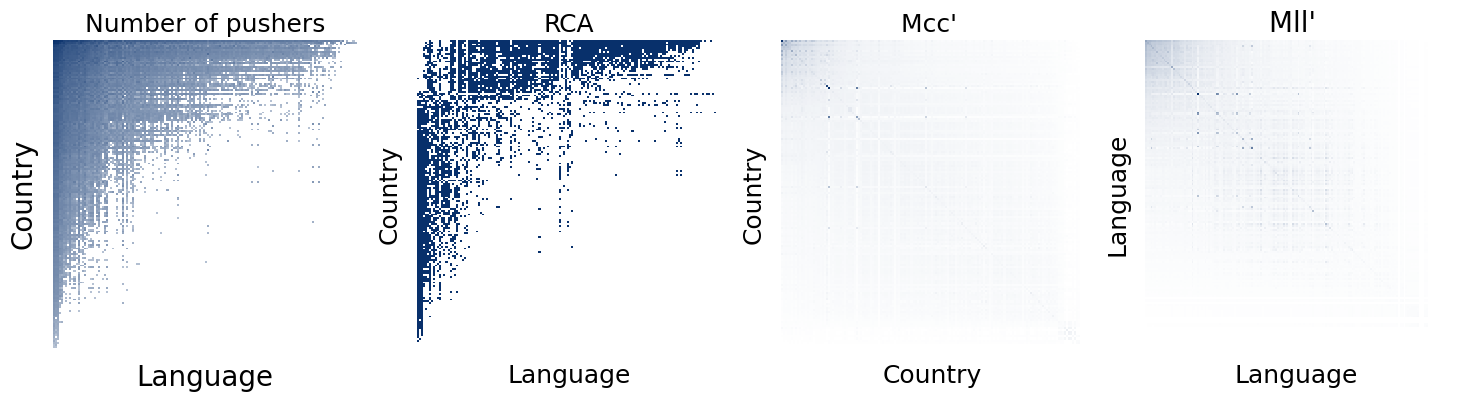

In [28]:
fig, ax = plt.subplots(1, 4, figsize=(18, 4))
cdf = pd.read_csv("../outputs/eci_software_2020_2023.csv", sep=";")
mcl_raw_matrix_nolabels(df, key_columns=["iso2_code", "language", "num_pushers"], heatmap=True, custom_colors=["#ffffff","#08306b"], size=20, ax=ax[0])
ax[0].set_title("Number of pushers", size=18)
mcp_matrix(cdf, key_columns=["iso2_code", "language", "mcp"], heatmap=True, custom_colors=["#ffffff","#08306b"], labels=["RCA", "Language", "Country"], fontsize=18, ax=ax[1])
mcc_matrix(cdf, key_columns=["iso2_code", "language", "rca"], heatmap=True, custom_colors=["#ffffff","#08306b"], size=18, ax=ax[2])
mll_matrix(cdf, key_columns=["iso2_code", "language", "rca"], heatmap=True, custom_colors=["#ffffff","#08306b"], size=18, ax=ax[3])

In [26]:
test = mcc_matrix(cdf, key_columns=["iso2_code", "language", "rca"], heatmap=False, custom_colors=["#ffffff","#08306b"], size=18, ax=ax[2])
test.fillna(0, inplace=True)
test.values.max()

19320.39960507331

In [201]:
def diversity_avg_ubiquity_complexity_scatter(df, ax=None):
    rca01 = df["rca"] >= 1
    df["rca01"] = rca01.astype(int) 
    df["w_ubi"] = df["rca01"] * df["ubiquity"]
    df["sum_w_ubi"] = df.groupby(["iso2_code"])["w_ubi"].transform("sum")    
    df["nr_rca01"] = df.groupby(["iso2_code"])["rca01"].transform("sum")
    df["mean_ubi"] = df["sum_w_ubi"] / df["nr_rca01"]

    df = df[["iso2_code", "eci", "diversity", "mean_ubi"]].drop_duplicates()
    #df["eci"] = (df["eci"] - df["eci"].min()) / (df["eci"].max() - df["eci"].min())

    vmin = min(df["eci"])
    vmax = max(df["eci"])
    norm = colors.Normalize(vmin=vmin, vmax=vmax, clip=True)
    mapper = cm.ScalarMappable(norm=norm, cmap=cm.Blues)
    eci_values = mapper.to_rgba(df["eci"].to_list())

    if ax is None:
        ax = plt.gca()
    ax.scatter(df["diversity"], df["mean_ubi"], color=eci_values, s=55)
    ax.set_xlabel("Language diversity", size=20)
    ax.set_ylabel("Average language ubiquity", size=20)
    ax.tick_params("x", labelsize=15)
    ax.tick_params("y", labelsize=15)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    cbar = fig.colorbar(mapper, pad=0.02, shrink=0.975, ax=ax)
    cbar.ax.set_ylabel('Software complexity', rotation=90, labelpad=15, fontsize=20)
    cbar.ax.tick_params(labelsize=15)

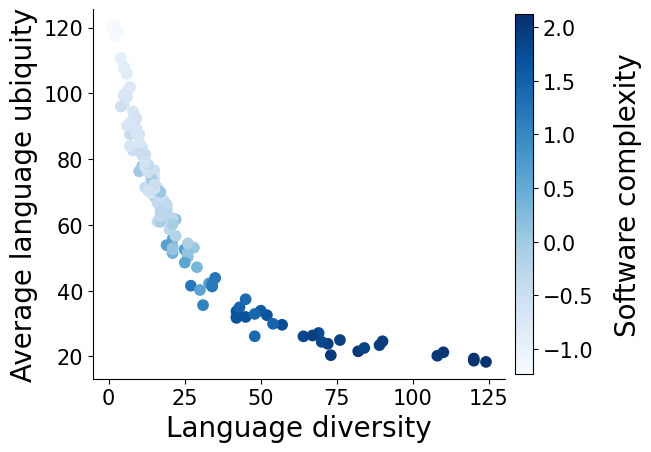

In [14]:
diversity_avg_ubiquity_complexity_scatter(cdf)

In [17]:
def ubiquity_avg_diversity_complexity_scatter(df, ax=None):
    rca01 = df["rca"] >= 1
    df["rca01"] = rca01.astype(int) 
    df["w_div"] = df["rca01"] * df["diversity"]
    df["sum_w_div"] = df.groupby(["language"])["w_div"].transform("sum")
    df["nr_rca01"] = df.groupby(["language"])["rca01"].transform("sum")
    df["mean_div"] = df["sum_w_div"] / df["nr_rca01"]

    df = df[["language", "pci", "ubiquity", "mean_div"]].drop_duplicates()

    vmin = min(df["pci"])
    vmax = max(df["pci"])
    norm = colors.Normalize(vmin=vmin, vmax=vmax, clip=True)
    mapper = cm.ScalarMappable(norm=norm, cmap=cm.Blues)
    pci_values = mapper.to_rgba(df["pci"].to_list())

    if ax is None:
        ax = plt.gca()
    ax.scatter(df["ubiquity"], df["mean_div"], color=pci_values, s=55)
    ax.set_xlabel("Language ubiquity", size=20)
    ax.set_ylabel("Average language diversity", size=20)
    ax.tick_params("x", labelsize=15)
    ax.tick_params("y", labelsize=15)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    cbar = fig.colorbar(mapper, pad=0.02, shrink=0.975, ax=ax)
    cbar.ax.set_ylabel('Language complexity', rotation=90, labelpad=15, fontsize=20)
    cbar.ax.tick_params(labelsize=15)

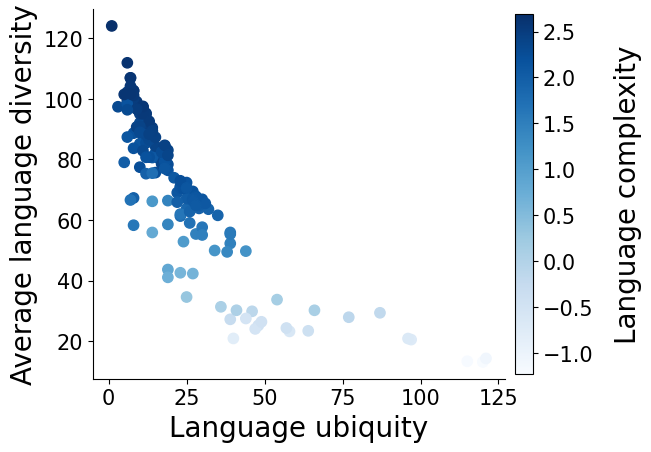

In [18]:
ubiquity_avg_diversity_complexity_scatter(cdf)

In [19]:
def complexity_complexity_matrix(df, heatmap, ax=None):
    # to sort location by eci
    location_sorter = df[["iso2_code", "eci"]]\
        .drop_duplicates()\
        .sort_values(by="eci", ascending=False)

    # only categories w/ RCA
    table = df[df["rca"] >= 1]
    table = table[["iso2_code", "language", "pci"]].drop_duplicates()
    
    table = pd.pivot_table(table,
        values="pci",
        index=["iso2_code"],
        columns=["language"],
        aggfunc=np.mean,
        margins=True,
        margins_name='total')
    
    # add the location_sorter and sort
    table = pd.merge(
        table,
        location_sorter,
        on="iso2_code",
        how="left"
    )

    table = table.sort_values(by=["eci"], ascending=False, axis=0)\
        .set_index("iso2_code")\
        .sort_values(by=["total"], ascending=False, axis=1)

    # remove supporter rows and cols
    table = table.drop(["eci"], axis=1).drop(["total"], axis=1).drop(["total"], axis=0)

    if heatmap==False:
        return table
    else:
        if ax is None:
            ax = plt.gca()

    sns.heatmap(table, cbar=False, cmap="Blues", ax=ax)
    ax.set_xlabel("Languages sorted by \n their complexity", size=20)
    ax.set_ylabel("Countries sorted by \n their complexity", size=20)
    #ax.set_xticklabels("")
    #ax.set_yticklabels("")
    ax.tick_params(left = False, bottom = False)

    # colorbar settings
    vmin = min(df["pci"])
    vmax = max(df["pci"])
    norm = colors.Normalize(vmin=vmin, vmax=vmax, clip=True)
    mapper = cm.ScalarMappable(norm=norm, cmap=cm.Blues)
    cbar = fig.colorbar(mapper, shrink=0.975, pad=0.02, ax=ax)
    cbar.ax.set_ylabel('Software complexity', rotation=90, labelpad=15, fontsize=20)
    cbar.ax.tick_params(labelsize=15)

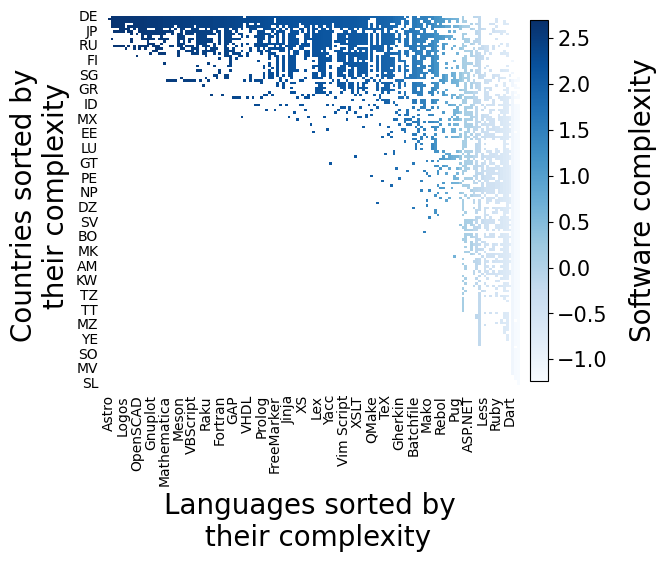

In [20]:
complexity_complexity_matrix(cdf, heatmap=True)

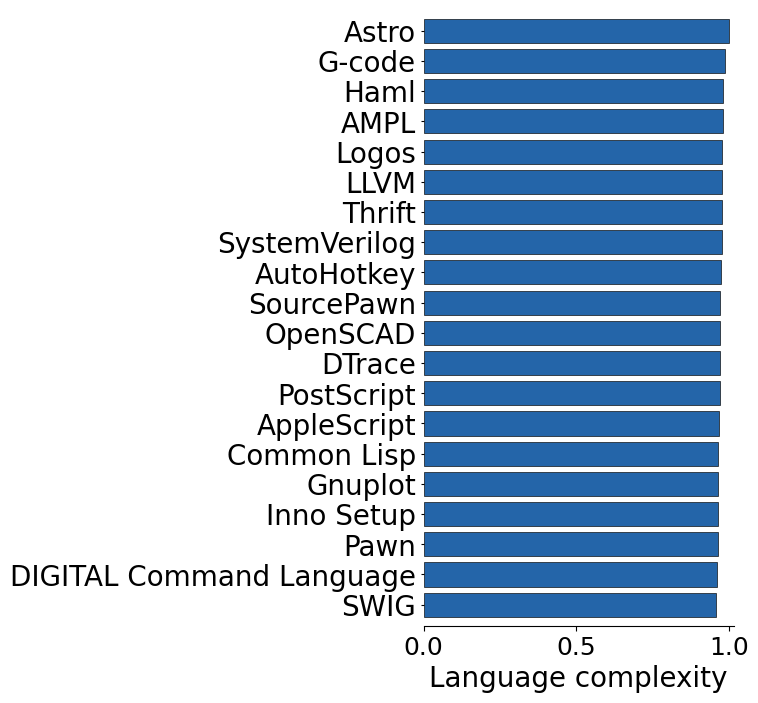

In [21]:
def poi_complexity_plot_top10(data, label_size, ax=None):
    data = data[["language", "pci"]].drop_duplicates()
    data["pci_norm"] = (data["pci"] - data["pci"].min()) / (data["pci"].max() - data["pci"].min())
    data = data.sort_values(by=["pci_norm"], ascending=True)
    data = data.iloc[-20:,]

    if ax is None:
        ax = plt.gca()
    ax.barh(data["language"], data["pci_norm"], color="#2465a9", edgecolor="black", linewidth=0.45)

    ax.margins(0.015, tight=True)
    ax.set_xlabel("Language complexity", size=label_size)
    ax.tick_params("y", size=2, labelsize=label_size)
    ax.tick_params("x", labelsize=label_size-2)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

fig, ax = plt.subplots(1,1, figsize=(4,8))
poi_complexity_plot_top10(cdf, label_size=20, ax=ax)

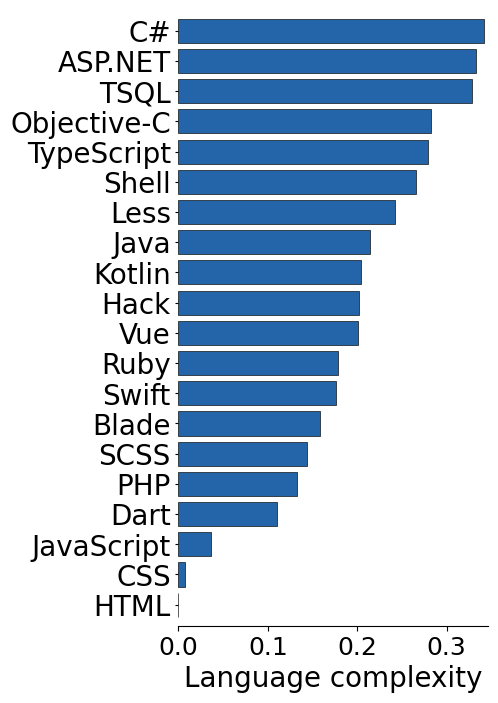

In [22]:
def poi_complexity_plot_bottom10(data, label_size, ax=None):
    data = data[["language", "pci"]].drop_duplicates()
    data["pci_norm"] = (data["pci"] - data["pci"].min()) / (data["pci"].max() - data["pci"].min())
    data = data.sort_values(by=["pci_norm"], ascending=False)
    data = data.iloc[-20:,].sort_values(by=["pci_norm"], ascending=True)

    if ax is None:
        ax = plt.gca()
    ax.barh(data["language"], data["pci_norm"], color="#2465a9", edgecolor="black", linewidth=0.45)

    ax.margins(0.015, tight=True)
    ax.set_xlabel("Language complexity", size=label_size)
    ax.tick_params("y", size=2, labelsize=label_size)
    ax.tick_params("x", labelsize=label_size-2)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

fig, ax = plt.subplots(1,1, figsize=(4,8))
poi_complexity_plot_bottom10(cdf, label_size=20, ax=ax)

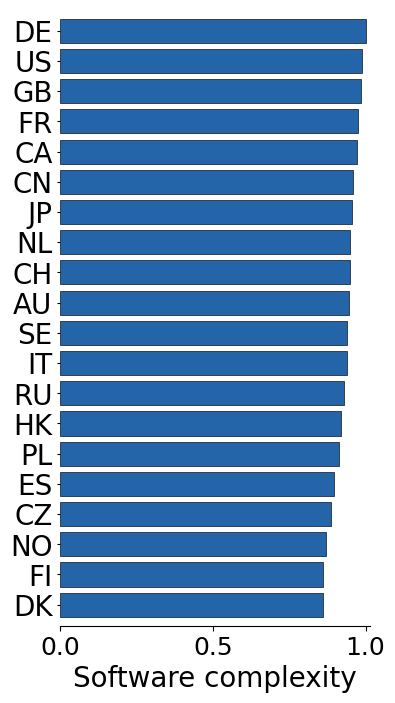

In [23]:
def software_complexity_plot_top10(data, label_size, ax=None):
    data = data[["iso2_code", "eci"]].drop_duplicates()
    data["eci_norm"] = (data["eci"] - data["eci"].min()) / (data["eci"].max() - data["eci"].min())
    data = data.sort_values(by=["eci_norm"], ascending=True)
    data = data.iloc[-20:,]

    if ax is None:
        ax = plt.gca()
    ax.barh(data["iso2_code"], data["eci_norm"], color="#2465a9", edgecolor="black", linewidth=0.45)

    ax.margins(0.015, tight=True)
    ax.set_xlabel("Software complexity", size=label_size)
    ax.tick_params("y", size=2, labelsize=label_size)
    ax.tick_params("x", labelsize=label_size-2)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

fig, ax = plt.subplots(1,1, figsize=(4,8))
software_complexity_plot_top10(cdf, label_size=20, ax=ax)

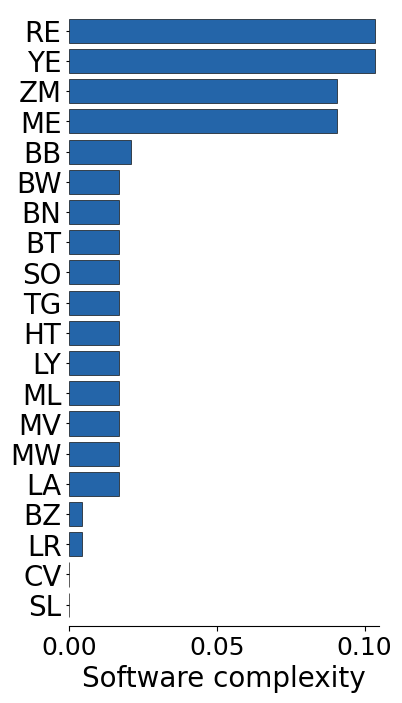

In [24]:
def software_complexity_plot_bottom10(data, label_size, ax=None):
    data = data[["iso2_code", "eci"]].drop_duplicates()
    data["eci_norm"] = (data["eci"] - data["eci"].min()) / (data["eci"].max() - data["eci"].min())
    data = data.sort_values(by=["eci_norm"], ascending=False)
    data = data.iloc[-20:,].sort_values(by=["eci_norm"], ascending=True)

    if ax is None:
        ax = plt.gca()
    ax.barh(data["iso2_code"], data["eci_norm"], color="#2465a9", edgecolor="black", linewidth=0.45)

    ax.margins(0.015, tight=True)
    ax.set_xlabel("Software complexity", size=label_size)
    ax.tick_params("y", size=2, labelsize=label_size)
    ax.tick_params("x", labelsize=label_size-2)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

fig, ax = plt.subplots(1,1, figsize=(4,8))
software_complexity_plot_bottom10(cdf, label_size=20, ax=ax)

**2 - github space related visuals**

In [25]:
# github space
space_df = pd.read_csv(f"../outputs/software_space_edgelist{period}.csv", sep=";")

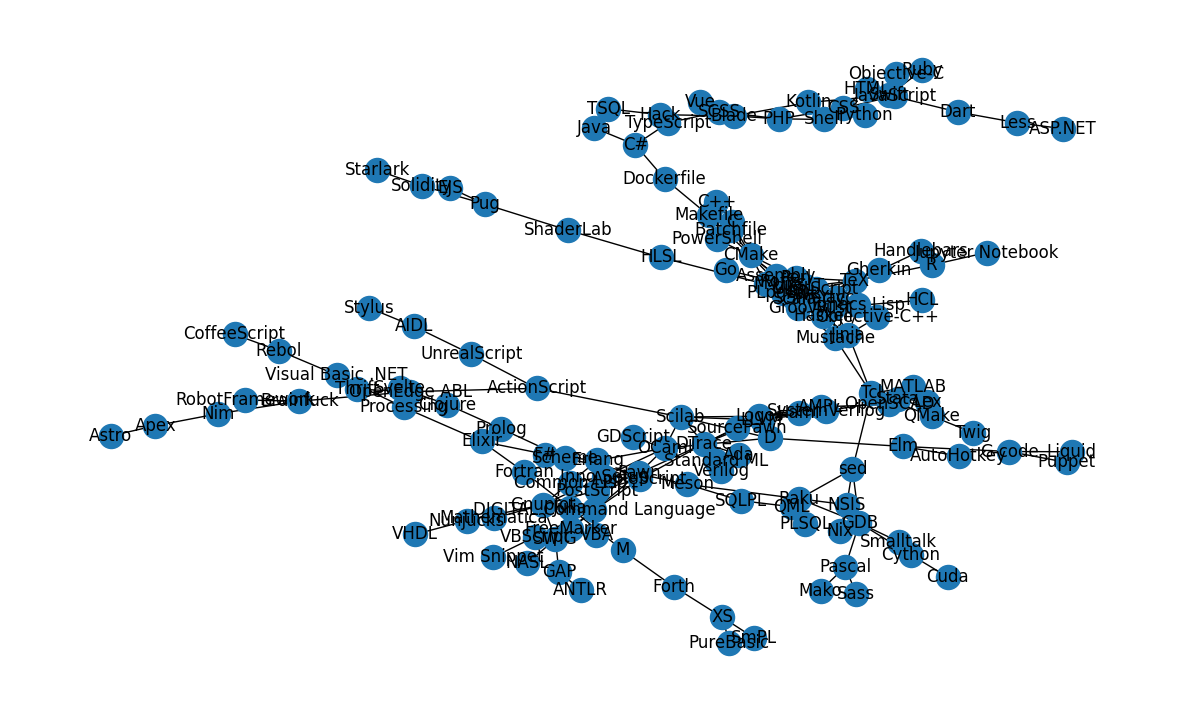

In [26]:
# network visual -- maximum spanning tree
language_graph = nx.from_pandas_edgelist(space_df, source="language_1", target="language_2")

fig, ax = plt.subplots(1,1, figsize=(15,9))
nx.draw(language_graph, with_labels=True, ax=ax)